In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import matplotlib.pyplot as plt
A_to_au_conversion = 1.8897259885789

Reference: https://pennylane.ai/qml/demos/tutorial_vqe/

In [2]:
def calc_vqe_H(r):
    symbols = ["H", "H"]
    geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
    H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)
    print("Number of qubits = ", qubits)
    print("The Hamiltonian is ", H)
    
    dev = qml.device("lightning.qubit", wires=qubits)
    electrons = 2
    hf = qml.qchem.hf_state(electrons, qubits)

    def circuit(param, wires):
        qml.BasisState(hf, wires=wires)
        qml.DoubleExcitation(param, wires=[0, 1, 2, 3])

    @qml.qnode(dev, interface="autograd")
    def cost_fn(param):
        circuit(param, wires=range(qubits))
        return qml.expval(H)

    opt = qml.GradientDescentOptimizer(stepsize=0.4)
    theta = np.array(0.0, requires_grad=True)

    # store the values of the cost function
    energy = [cost_fn(theta)]
    # store the values of the circuit parameter
    angle = [theta]
    max_iterations = 100
    conv_tol = 1e-06

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        energy.append(cost_fn(theta))
        angle.append(theta)

        conv = np.abs(energy[-1] - prev_energy)

        if n % 2 == 0:
            print(f"Step = {n},  Energy = {energy[-1]:.8f} Ha")

        if conv <= conv_tol:
            break

    return energy, angle, n


In [3]:
energy, angle, n = calc_vqe_H(0.742)

Number of qubits =  4
The Hamiltonian is    (-0.2225098666481647) [Z3]
+ (-0.22250986664816463) [Z2]
+ (-0.09963186538176191) [I0]
+ (0.17110569283214036) [Z0]
+ (0.17110569283214036) [Z1]
+ (0.12051037033744402) [Z0 Z2]
+ (0.12051037033744402) [Z1 Z3]
+ (0.16584097082970475) [Z0 Z3]
+ (0.16584097082970475) [Z1 Z2]
+ (0.16859357109492182) [Z0 Z1]
+ (0.17432084502934375) [Z2 Z3]
+ (-0.04533060049226072) [Y0 Y1 X2 X3]
+ (-0.04533060049226072) [X0 X1 Y2 Y3]
+ (0.04533060049226072) [Y0 X1 X2 Y3]
+ (0.04533060049226072) [X0 Y1 Y2 X3]
Step = 0,  Energy = -1.12772116 Ha


/home/azhar04/anaconda3/envs/quantum-dev/lib/python3.8/site-packages/pennylane_lightning/lightning_qubit/lightning_qubit.py:822: UserWarning: Pre-compiled binaries for lightning.qubit are not available. Falling back to using the Python-based default.qubit implementation. To manually compile from source, follow the instructions at https://pennylane-lightning.readthedocs.io/en/latest/installation.html.
  warn(


Step = 2,  Energy = -1.13524632 Ha
Step = 4,  Energy = -1.13683935 Ha
Step = 6,  Energy = -1.13717432 Ha
Step = 8,  Energy = -1.13724465 Ha
Step = 10,  Energy = -1.13725942 Ha
Step = 12,  Energy = -1.13726252 Ha


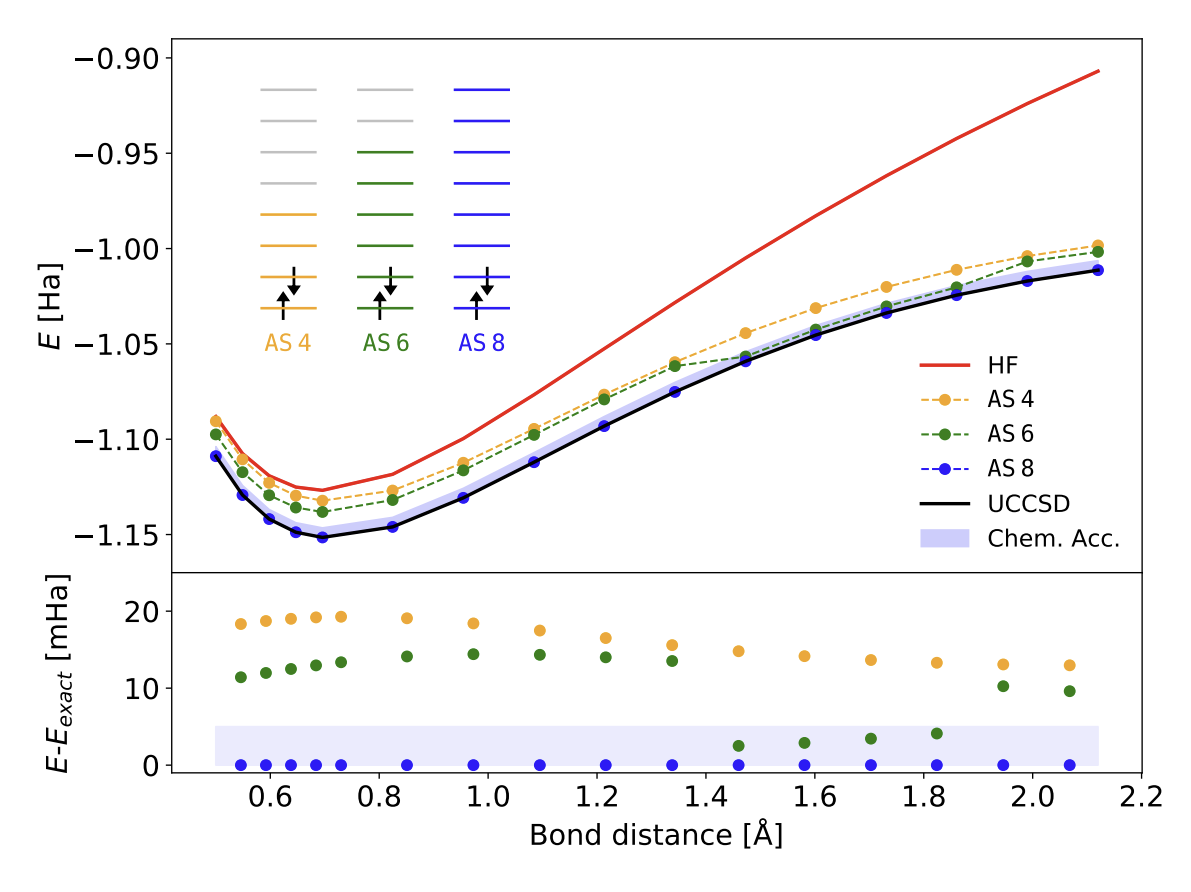

In [5]:
electrons = 2
orbitals = 8
core, active = qchem.active_space(electrons, orbitals, active_electrons=2, active_orbitals=4)

print("List of core orbitals: {:}".format(core))
print("List of active orbitals: {:}".format(active))
print("Number of qubits: {:}".format(2 * len(active)))

List of core orbitals: []
List of active orbitals: [0, 1, 2, 3]
Number of qubits: 8


In [9]:
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74*A_to_au_conversion])
charge = 0
multiplicity = 1
basis_set = "6-31g"

H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=2,
    active_orbitals=4,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the water molecule")
print(H)

Number of qubits required to perform quantum simulations: 8
Hamiltonian of the water molecule
  (-1.0388070499669555) [Z6]
+ (-1.0388070499669555) [Z7]
+ (-0.6906038713885432) [Z4]
+ (-0.6906038713885431) [Z5]
+ (-0.40481957262019463) [Z2]
+ (-0.4048195726201946) [Z3]
+ (-0.2723079680160565) [Z0]
+ (-0.2723079680160565) [Z1]
+ (2.2418796987327942) [I0]
+ (0.08633296824291076) [Z2 Z4]
+ (0.08633296824291076) [Z3 Z5]
+ (0.0884302426171938) [Z0 Z2]
+ (0.0884302426171938) [Z1 Z3]
+ (0.09373572421680151) [Z2 Z6]
+ (0.09373572421680151) [Z3 Z7]
+ (0.0953217546270026) [Z2 Z5]
+ (0.0953217546270026) [Z3 Z4]
+ (0.09644577079552508) [Z2 Z3]
+ (0.1056507109018401) [Z0 Z4]
+ (0.1056507109018401) [Z1 Z5]
+ (0.10624556376996719) [Z4 Z6]
+ (0.10624556376996719) [Z5 Z7]
+ (0.10842868920560308) [Z0 Z3]
+ (0.10842868920560308) [Z1 Z2]
+ (0.11060590118080146) [Z2 Z7]
+ (0.11060590118080146) [Z3 Z6]
+ (0.11590671025006483) [Z4 Z5]
+ (0.13142195510285826) [Z0 Z6]
+ (0.13142195510285826) [Z1 Z7]
+ (0.132993

In [11]:
electrons = 2
orbitals = 8
core, active = qchem.active_space(electrons, orbitals, active_electrons=2, active_orbitals=8)

print("List of core orbitals: {:}".format(core))
print("List of active orbitals: {:}".format(active))
print("Number of qubits: {:}".format(2 * len(active)))

List of core orbitals: []
List of active orbitals: [0, 1, 2, 3, 4, 5, 6, 7]
Number of qubits: 16


In [16]:
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.74*A_to_au_conversion])
charge = 0
multiplicity = 1
basis_set = "6-31G"

H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=2,
    active_orbitals=6,
)

print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the water molecule")
print(H)

ValueError: The number of core (0) + active orbitals (6) cannot be greater than the total number of orbitals (4)